In [101]:
import pandas as pd
import numpy as np

cpa = pd.read_csv(r'../input/customer-personality-analysis/marketing_campaign.csv', sep = '\t')
cpa.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,5,0,0,0,0,0,0,3,11,0


In [102]:
cpa.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

In [103]:
cpa['Income'].fillna(np.mean(cpa['Income']), inplace = True)

In [104]:
cpa.drop(['Z_CostContact', 'Z_Revenue', 'ID', 'Dt_Customer'], inplace = True, axis = 1)

In [105]:
cpa['Age'] = 2021 - cpa['Year_Birth']

In [106]:
cpa.drop(['Year_Birth'], inplace = True, axis = 1)

In [107]:
cpa['Marital_Status'] = cpa['Marital_Status'].replace(['Alone', 'YOLO', 'Absurd', 'Divorced', 'Widow'], 'Single')
cpa['Marital_Status'] = cpa['Marital_Status'].replace(['Married', 'Together'], 'Relationship')

In [108]:
cpa['Marital_Status'].value_counts()

Relationship    1444
Single           796
Name: Marital_Status, dtype: int64

In [109]:
cpa['Education'] = cpa['Education'].replace(['2n Cycle'], 'Master')
cpa['Education'].value_counts()

Graduation    1127
Master         573
PhD            486
Basic           54
Name: Education, dtype: int64

In [110]:
cpa['Income'] = cpa['Income'] / 1000

In [111]:
cpa.drop(cpa[(cpa['Income'] > 200) | (cpa['Age'] > 100)].index, inplace = True)

In [112]:
pd.DataFrame(cpa.nunique()).sort_values(0).rename({ 0 : 'Unique Values'}, axis = 1)

,Unique Values
Marital_Status,2
Complain,2
AcceptedCmp2,2
AcceptedCmp1,2
AcceptedCmp5,2
AcceptedCmp4,2
AcceptedCmp3,2
Response,2
Kidhome,3
Teenhome,3


In [113]:
cpa['Children'] = cpa['Kidhome'] + cpa['Teenhome']

In [114]:
cpa['MntTotal'] = np.sum(cpa.filter(regex = 'Mnt'), axis = 1)
cpa['NumTotal'] = np.sum(cpa.filter(regex = 'Purchases'), axis = 1)
cpa['AcceptedTotal'] = np.sum(cpa.filter(regex = 'Accepted'), axis = 1)

In [115]:
cpa.drop(columns = ['MntFruits', 'MntSweetProducts', 'MntFishProducts', 'MntGoldProds', 'MntMeatProducts', 'MntWines',
        'AcceptedCmp2', 'AcceptedCmp1', 'AcceptedCmp5', 'AcceptedCmp4', 'AcceptedCmp3', 'NumStorePurchases',
        'NumCatalogPurchases', 'NumDealsPurchases', 'Kidhome','Teenhome'],
         inplace = True)

In [116]:
cpa['AvgWeb'] = round(cpa['NumWebPurchases'] / cpa['NumWebVisitsMonth'], 2)
cpa['AvgWeb'].fillna(0, inplace = True)
cpa.replace(np.inf, 0, inplace = True)

In [117]:
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()

for i in ['Education', 'Marital_Status']:
    cpa[i] = cpa[[i]].apply(encoder.fit_transform)

In [118]:
cpa.drop(columns = ['NumWebPurchases', 'NumWebVisitsMonth'], inplace = True)

In [119]:
cpa.head()

,Education,Marital_Status,Income,Recency,Complain,Response,Age,Children,MntTotal,NumTotal,AcceptedTotal,AvgWeb
0,1,1,58.138,58,0,1,64,0,1617,25,0,1.14
1,1,1,46.344,38,0,0,67,2,27,6,0,0.20
2,1,0,71.613,26,0,0,56,0,776,21,0,2.00
3,1,0,26.646,26,0,0,37,1,53,8,0,0.33
4,3,0,58.293,94,0,0,40,1,422,19,0,1.00


In [120]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X = scaler.fit_transform(cpa)

In [121]:
X = pd.DataFrame(X)
X.columns = cpa.columns
X.head()

,Education,Marital_Status,Income,Recency,Complain,Response,Age,Children,MntTotal,NumTotal,AcceptedTotal,AvgWeb
0,-0.792105,1.347635,0.288513,0.306856,-0.095001,2.386338,1.016868,-1.264308,1.680176,1.319340,-0.438933,0.040469
1,-0.792105,1.347635,-0.262438,-0.383971,-0.095001,-0.419052,1.273264,1.395139,-0.962202,-1.155857,-0.438933,-0.667232
2,-0.792105,-0.742041,0.917992,-0.798467,-0.095001,-0.419052,0.333146,-1.264308,0.282541,0.798246,-0.438933,0.687940
3,-0.792105,-0.742041,-1.182621,-0.798467,-0.095001,-0.419052,-1.290693,0.065416,-0.918994,-0.895310,-0.438933,-0.569359
4,1.590069,-0.742041,0.295754,1.550344,-0.095001,-0.419052,-1.034298,0.065416,-0.305762,0.537699,-0.438933,-0.064934


<AxesSubplot:xlabel='cluster', ylabel='inertia'>

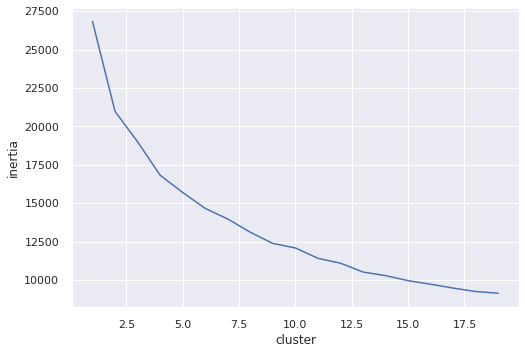

In [122]:
from sklearn.cluster import KMeans
import seaborn as sns
sns.set()

inertia = []

for i in range(1, 20):
    model = KMeans(n_clusters = i, init = 'k-means++')
    model.fit(X)
    inertia.append(model.inertia_)
    
    
inertia_data = pd.DataFrame({
              'cluster' : np.arange(1, 20, 1),
              'inertia' : inertia
})

sns.lineplot(x = 'cluster', y = 'inertia', data = inertia_data)

In [123]:
pip install -U yellowbrick

Note: you may need to restart the kernel to use updated packages.


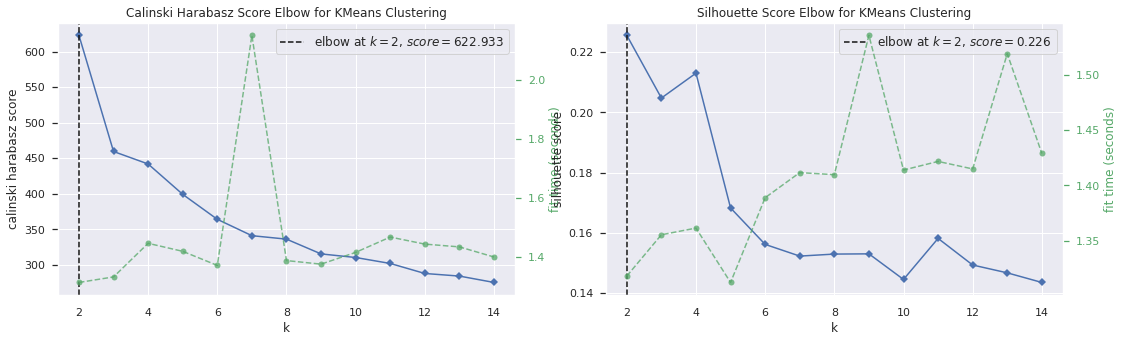

In [124]:
import scipy
from yellowbrick.cluster import KElbowVisualizer
import matplotlib.pyplot as plt

plt.figure(figsize = (18, 5))

plt.subplot(121)

visualizer = KElbowVisualizer(model, k = (2, 15), metric = 'calinski_harabasz')
visualizer.fit(X)
visualizer.finalize()

plt.subplot(122)

visualizer = KElbowVisualizer(model, k = (2, 15), metric = 'silhouette')
visualizer.fit(X)
visualizer.finalize()

In [125]:
model2 = KMeans(n_clusters = 2, init = 'k-means++', random_state = 1)

ClusteredData = model2.fit_predict(X)
X['Cluster'] = ClusteredData + 1
X['Cluster'].value_counts()

1    1240
2     996
Name: Cluster, dtype: int64

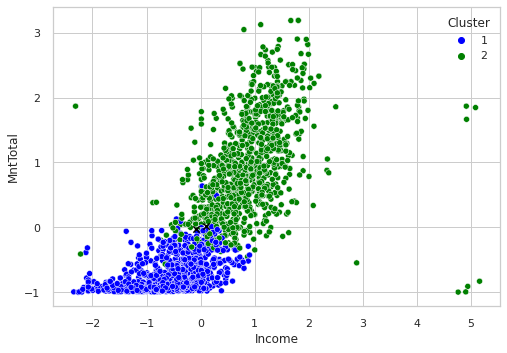

In [126]:
sns.set_style('whitegrid')
sns.scatterplot(x = 'Income', y = 'MntTotal', hue = 'Cluster', data = X, palette = ['blue', 'green'])
plt.scatter(model2.cluster_centers_[ : , 0], model2.cluster_centers_[ : , 1], s = 40, c = 'black',
               marker = 'x', label = 'Centroids')

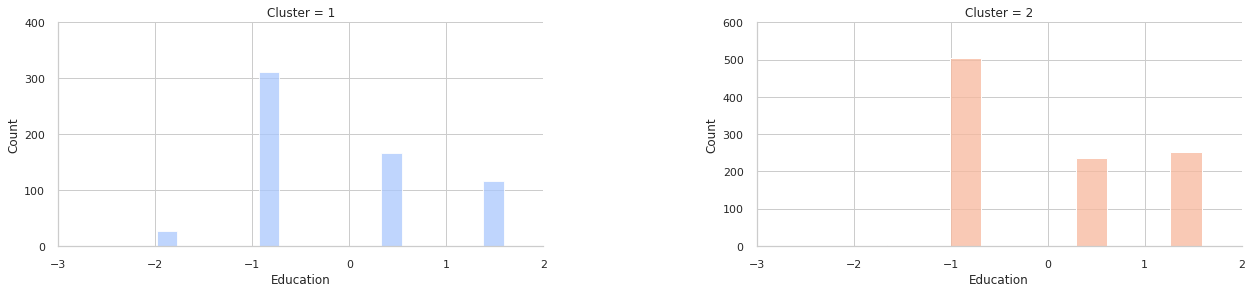

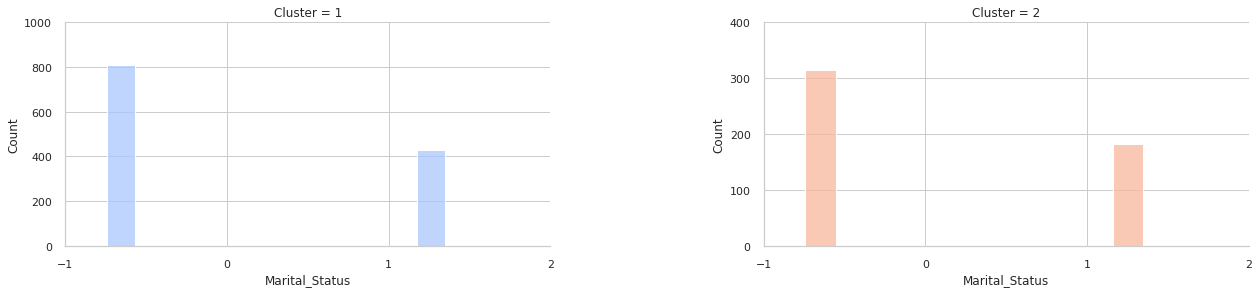

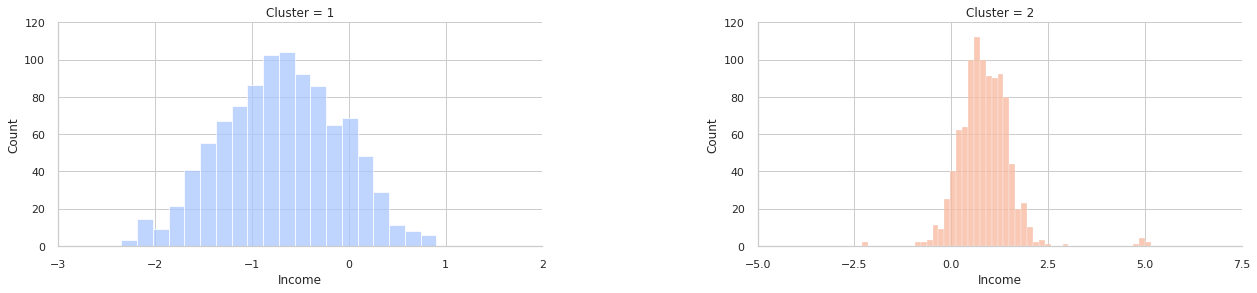

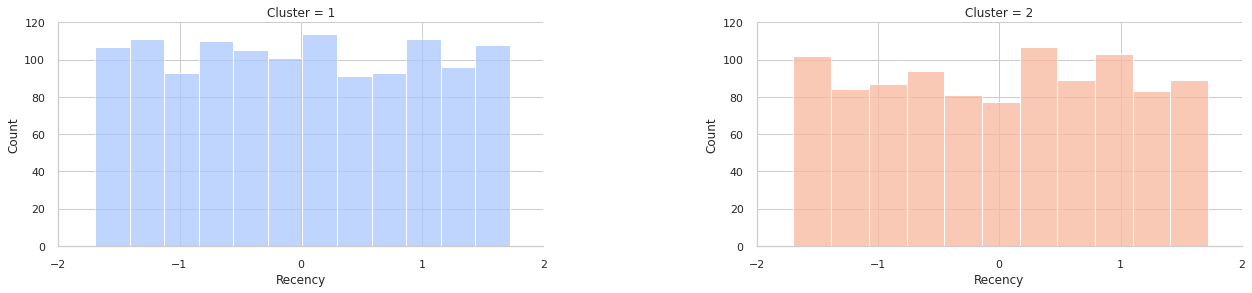

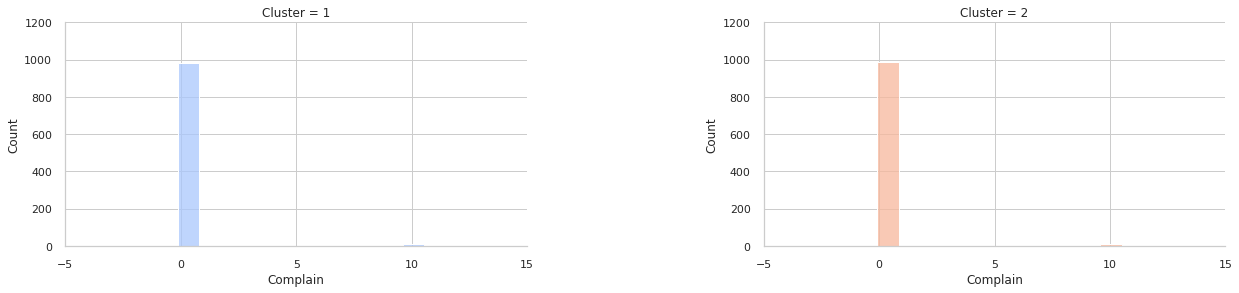

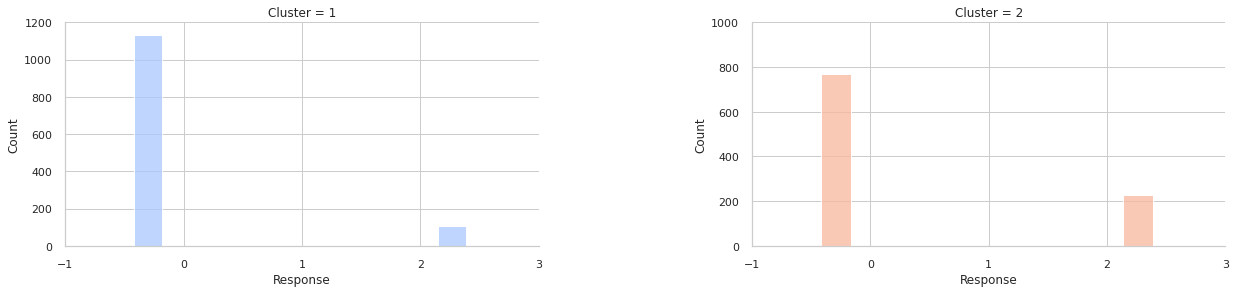

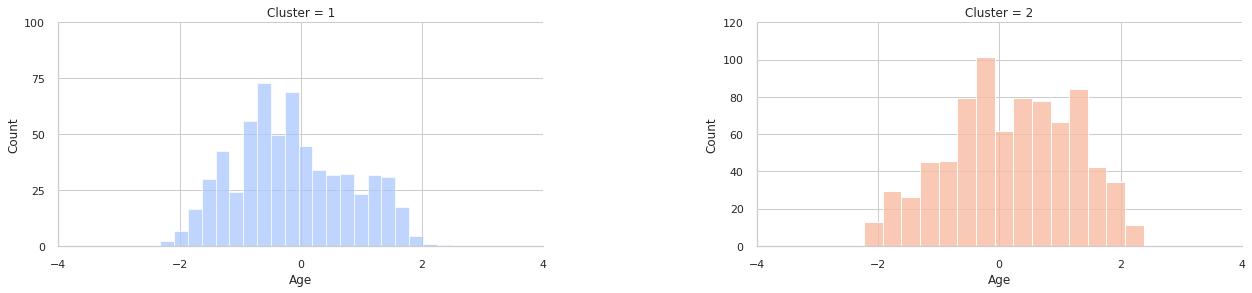

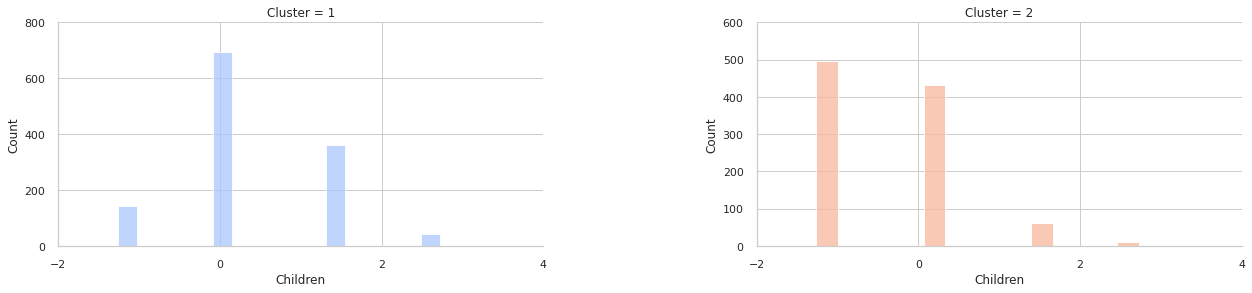

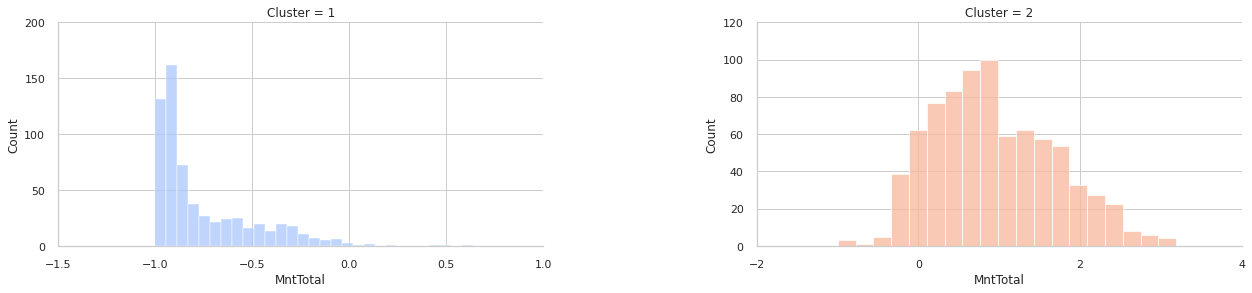

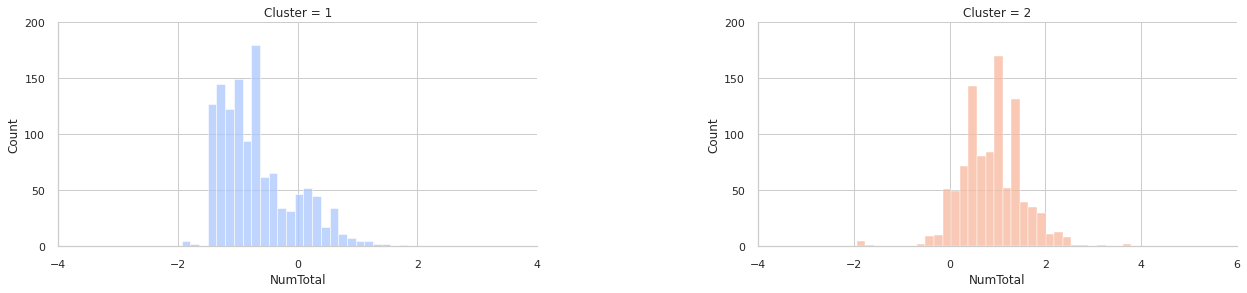

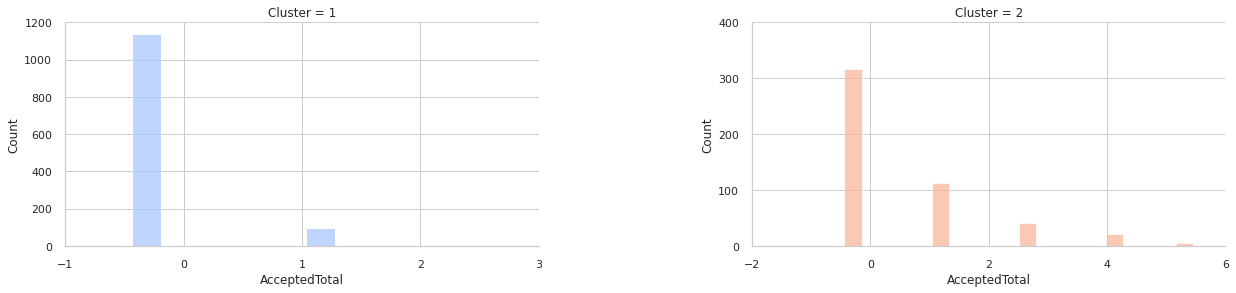

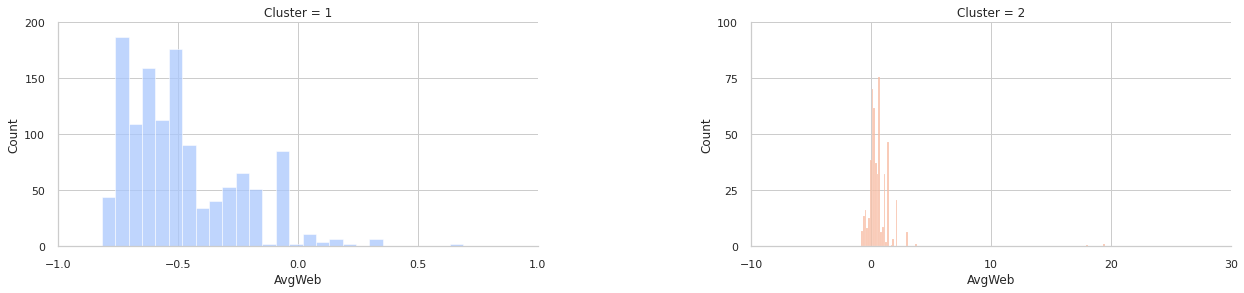

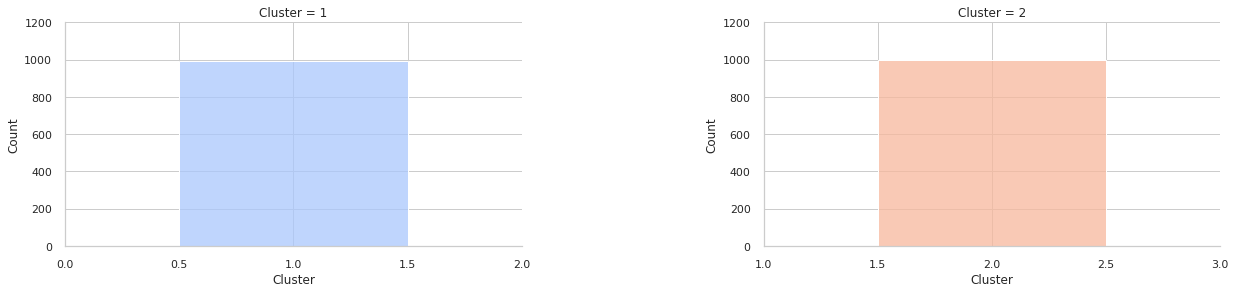

In [127]:
for i in X:
    z = sns.FacetGrid(X, col = 'Cluster', hue = 'Cluster', palette = 'coolwarm', sharex = False, sharey = False)
    z.map(sns.histplot, i)
    
    z.set_xticklabels()
    z.set_yticklabels()
    z.fig.set_figheight(5)
    z.fig.set_figwidth(20)